# COVID-19(CORONA VIRUS) : EXPLORATORY DATA ANALYSIS

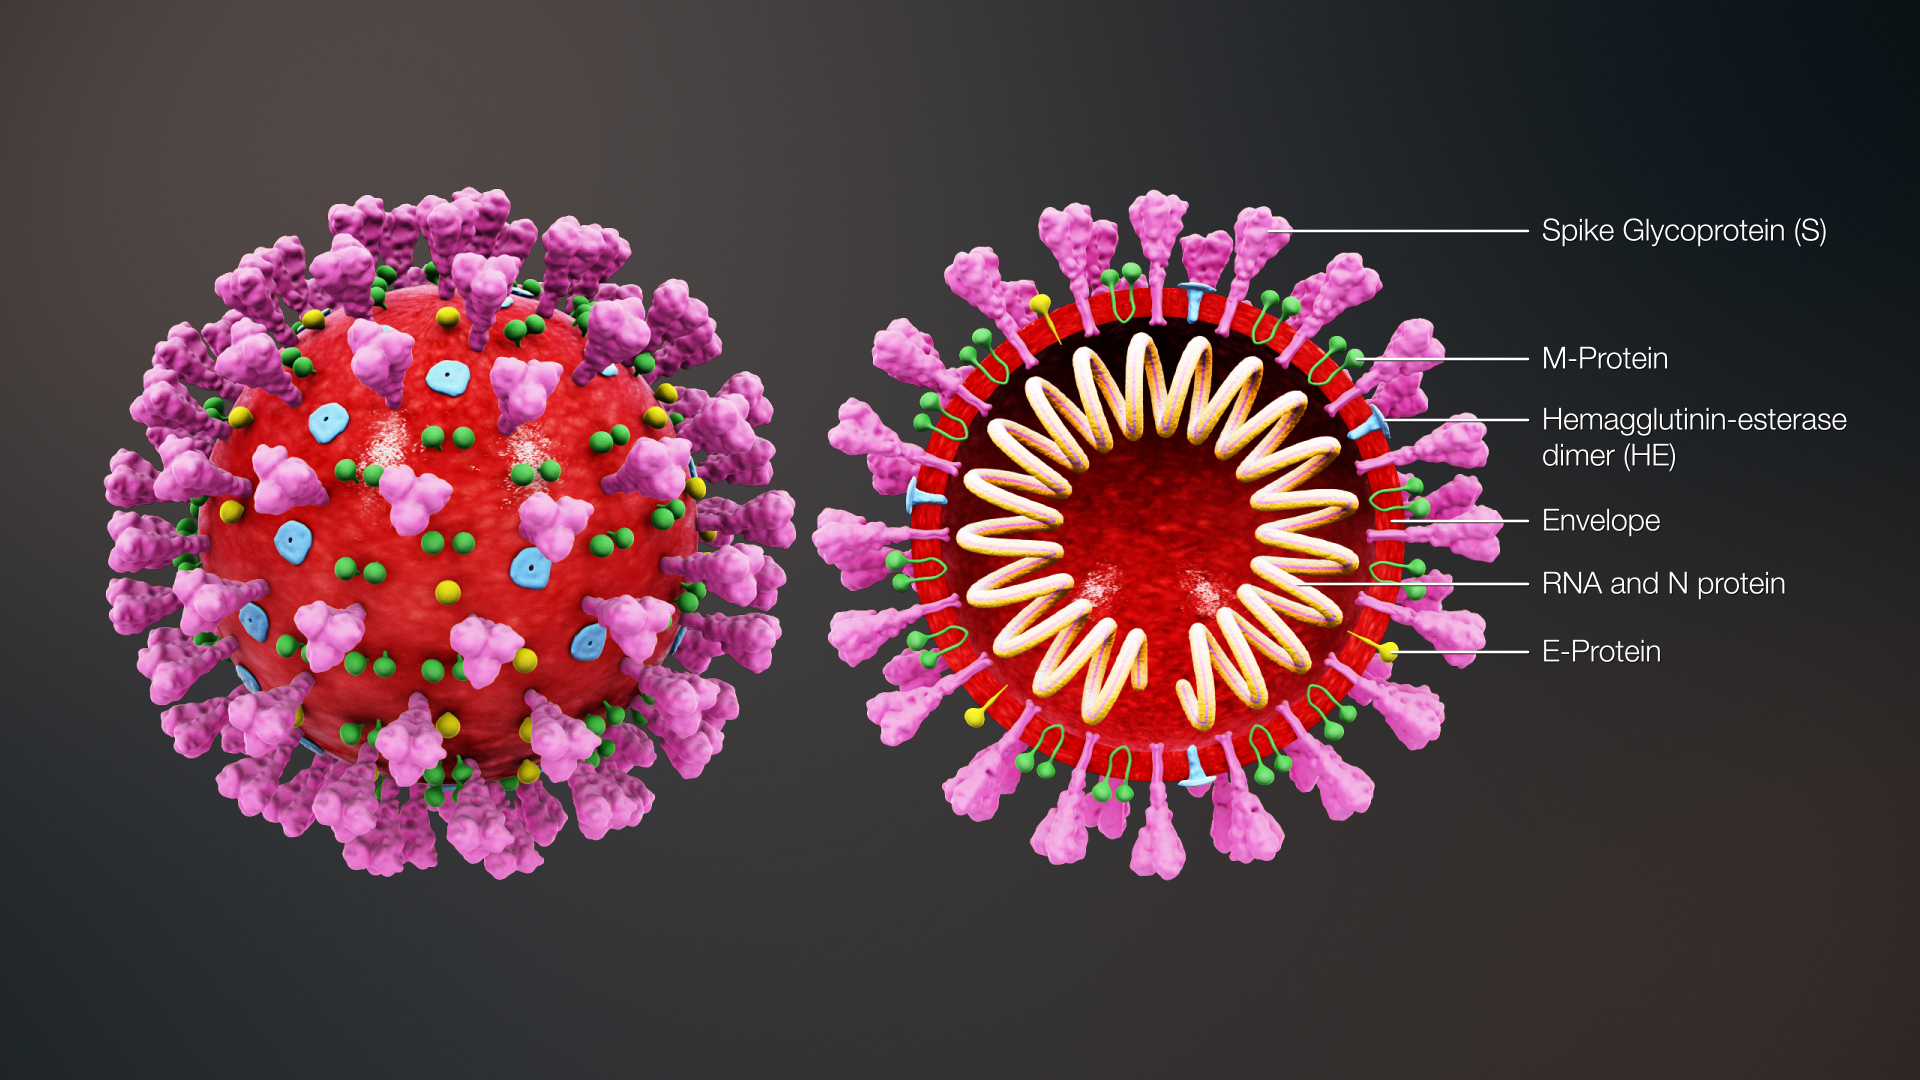

In [1]:
# Installing Dependencies

!pip install pycountry_convert
!pip install folium
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
!pip install keras
!pip install tensorflow
!pip install --upgrade pip

    100% |████████████████████████████████| 10.0MB 5.0MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 40.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for pycountry ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
pytest-cov 2.8.1 has requirement pytest>=3.6, but you'll have pytest 3.5.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 92kB 28.1MB/s ta 0:00:01
pytest-cov 2.8.1 has requirement pytest>=3.6, but you'll have pytest 3.5.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
--2020-04-09 14:16:40--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/

pytest-cov 2.8.1 has requirement pytest>=3.6, but you'll have pytest 3.5.1 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 109.2MB 434kB/s eta 0:00:01
    100% |████████████████████████████████| 3.2MB 18.2MB/s ta 0:00:01
    100% |████████████████████████████████| 491kB 36.1MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 30.5MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 42.9MB/s ta 0:00:01
    100% |████████████████████████████████| 19.5MB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 20.2MB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 38.4MB/s ta 0:00:01
    100% |████████████████████████████████| 583kB 34.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/8e/28/49/fad4e7f

In [2]:
#!pip install tensorflow
!conda install tensorflow --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astor-0.8.0                |           py36_0          45 KB
    libprotobuf-3.11.4         |       hd408876_0         4.8 MB
    opt_einsum-3.1.0           |             py_0          54 KB
    markdown-3.1.1             |           py36_0         113 KB
    tensorflow-2.0.0           |mkl_py36hef7ec59_0           3 KB
    certifi-2020.4.5.1         |           py36_0         159 KB
    google-pasta-0.2.0         |             py_0          44 KB
    termcolor-1.1.0            |           py36_1           7 K

In [3]:
!pip install imgkit

  Created wheel for imgkit: filename=imgkit-1.0.2-py3-none-any.whl size=6600 sha256=856b50f0ce0eed09fc0c0a24d4d8b3cbcbb65a309f38476b6cc7a000f26398b4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/ab/97/63/d1aaf14815a0c4979c0c231f25422414d2768d6919e1ffa443
Successfully built imgkit


In [74]:
!pip install wkhtmltopdf

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from datetime import datetime,timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
from pandas.plotting import table

from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop,Adam
import imgkit


%matplotlib inline

In [76]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [77]:
df_covid19.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Australia,2020-04-09 17:12:43,-25.0000,133.0000,6108,51,1472,4585
1,Austria,2020-04-09 17:04:57,47.5162,14.5501,13233,295,5240,7698
2,Canada,2020-04-09 17:12:25,60.0010,-95.0010,19773,462,4877,0
3,China,2020-04-09 12:08:14,30.5928,114.3055,82883,3339,77679,1865
4,Denmark,2020-04-09 17:04:57,56.0000,10.0000,5830,237,1883,3710


In [78]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19


In [79]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,6,6,7,7,11,14,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,11,15,15,16,17,20,20,21,22,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,35,44,58,86,105,130,152,173,193,205
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,8,12,14,15,16,17,18,21,22,23
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [80]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,5,5,10,10,10,15,18,18,29
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,44,52,67,76,89,99,104,116,131,154
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,46,61,61,62,90,90,90,113,237
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,10,10,10,16,21,26,31,39,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,1,1,1,2,2,2,2,2


In [81]:
df_confirmed = df_confirmed.rename(columns={'Province/State':'state','Country/Region':'country'})
df_deaths = df_deaths.rename(columns={'Province/State':'state','Country/Region':'country'})
df_recovered = df_recovered.rename(columns={'Province/State':'state','Country/Region':'country'})
df_covid19 = df_covid19.rename(columns={'Country_Region':'country'})
df_covid19['Active'] = df_covid19['Confirmed'] - df_covid19['Recovered'] - df_covid19['Deaths']

In [82]:
# Changing the conuntry names as required by pycountry_convert Lib
df_confirmed.loc[df_confirmed['country'] == "US", "country"] = "USA"
df_deaths.loc[df_deaths['country'] == "US", "country"] = "USA"
df_covid19.loc[df_covid19['country'] == "US", "country"] = "USA"
df_table.loc[df_table['Country_Region'] == "US", "Country_Region"] = "USA"
df_recovered.loc[df_recovered['country'] == "US", "country"] = "USA"


df_confirmed.loc[df_confirmed['country'] == 'Korea, South', "country"] = 'South Korea'
df_deaths.loc[df_deaths['country'] == 'Korea, South', "country"] = 'South Korea'
df_covid19.loc[df_covid19['country'] == "Korea, South", "country"] = "South Korea"
df_table.loc[df_table['Country_Region'] == "Korea, South", "Country_Region"] = "South Korea"
df_recovered.loc[df_recovered['country'] == 'Korea, South', "country"] = 'South Korea'

df_confirmed.loc[df_confirmed['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_deaths.loc[df_deaths['country'] == 'Taiwan*', "country"] = 'Taiwan'
df_covid19.loc[df_covid19['country'] == "Taiwan*", "country"] = "Taiwan"
df_table.loc[df_table['Country_Region'] == "Taiwan*", "Country_Region"] = "Taiwan"
df_recovered.loc[df_recovered['country'] == 'Taiwan*', "country"] = 'Taiwan'

df_confirmed.loc[df_confirmed['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Kinshasa)", "country"] = "Democratic Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Kinshasa)", "Country_Region"] = "Democratic Republic of the Congo"
df_recovered.loc[df_recovered['country'] == 'Congo (Kinshasa)', "country"] = 'Democratic Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_covid19.loc[df_covid19['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"
df_table.loc[df_table['Country_Region'] == "Cote d'Ivoire", "Country_Region"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered['country'] == "Cote d'Ivoire", "country"] = "Côte d'Ivoire"

df_confirmed.loc[df_confirmed['country'] == "Reunion", "country"] = "Réunion"
df_deaths.loc[df_deaths['country'] == "Reunion", "country"] = "Réunion"
df_covid19.loc[df_covid19['country'] == "Reunion", "country"] = "Réunion"
df_table.loc[df_table['Country_Region'] == "Reunion", "Country_Region"] = "Réunion"
df_recovered.loc[df_recovered['country'] == "Reunion", "country"] = "Réunion"

df_confirmed.loc[df_confirmed['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_deaths.loc[df_deaths['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'
df_covid19.loc[df_covid19['country'] == "Congo (Brazzaville)", "country"] = "Republic of the Congo"
df_table.loc[df_table['Country_Region'] == "Congo (Brazzaville)", "Country_Region"] = "Republic of the Congo"
df_recovered.loc[df_recovered['country'] == 'Congo (Brazzaville)', "country"] = 'Republic of the Congo'

df_confirmed.loc[df_confirmed['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_deaths.loc[df_deaths['country'] == 'Bahamas, The', "country"] = 'Bahamas'
df_covid19.loc[df_covid19['country'] == "Bahamas, The", "country"] = "Bahamas"
df_table.loc[df_table['Country_Region'] == "Bahamas, The", "Country_Region"] = "Bahamas"
df_recovered.loc[df_recovered['country'] == 'Bahamas, The', "country"] = 'Bahamas'

df_confirmed.loc[df_confirmed['country'] == 'Gambia, The', "country"] = 'Gambia'
df_deaths.loc[df_deaths['country'] == 'Gambia, The', "country"] = 'Gambia'
df_covid19.loc[df_covid19['country'] == "Gambia, The", "country"] = "Gambia"
df_table.loc[df_table['Country_Region'] == "Gambia", "Country_Region"] = "Gambia"
df_recovered.loc[df_recovered['country'] == 'Gambia, The', "country"] = 'Gambia'

# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [83]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_confirmed = df_confirmed.drop(['state'],axis=1)
df_confirmed.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,170,174,237,273,281,299,349,367,423,444
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,223,243,259,277,304,333,361,377,383,400
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,584,716,847,986,1171,1251,1320,1423,1468,1572
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,370,376,390,428,439,466,501,525,545,564
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,7,7,8,8,8,10,14,16,17,19


In [84]:

df_deaths = df_deaths.replace(np.nan, '', regex=True)
df_deaths = df_deaths.drop(['state'],axis=1)
df_deaths.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,4,4,4,6,6,7,7,11,14,14
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,11,15,15,16,17,20,20,21,22,22
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,35,44,58,86,105,130,152,173,193,205
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,8,12,14,15,16,17,18,21,22,23
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [85]:
df_recovered = df_recovered.replace(np.nan, '', regex=True)
df_recovered = df_recovered.drop(['state'],axis=1)
df_recovered.head()

,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,2,5,5,10,10,10,15,18,18,29
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,44,52,67,76,89,99,104,116,131,154
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,37,46,61,61,62,90,90,90,113,237
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,10,10,10,10,16,21,26,31,39,52
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,0,1,1,1,1,2,2,2,2,2


In [86]:
df_table = df_table.replace(np.nan, '', regex=True)
df_table.head()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered
0,Afghanistan,2020-01-22,0,0,,,0,
1,Afghanistan,2020-01-23,0,0,,,0,
2,Afghanistan,2020-01-24,0,0,,,0,
3,Afghanistan,2020-01-25,0,0,,,0,
4,Afghanistan,2020-01-26,0,0,,,0,


In [87]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis=1)

In [88]:
df_countries_cases.head()

,country,Confirmed,Deaths,Recovered,Active
0,Australia,6108,51,1472,4585
1,Austria,13233,295,5240,7698
2,Canada,19773,462,4877,14434
3,China,82883,3339,77679,1865
4,Denmark,5830,237,1883,3710


In [89]:
df_countries_cases.index = df_countries_cases['country']
df_countries_cases = df_countries_cases.drop(['country'],axis=1)
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
country,,,,
Australia,6108,51,1472,4585
Austria,13233,295,5240,7698
Canada,19773,462,4877,14434
China,82883,3339,77679,1865
Denmark,5830,237,1883,3710


In [90]:
df_countries_cases = df_countries_cases.groupby(['country']).sum()

In [91]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
country,,,,
Afghanistan,484,15,32,437
Albania,409,22,165,222
Algeria,1666,235,347,1084
Andorra,583,25,58,500
Angola,19,2,2,15


In [92]:
df_countries_cases['Mortality_Rate(per100)'] = np.round(100 * df_countries_cases['Deaths']/df_countries_cases['Confirmed'],2)

In [93]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
country,,,,,
Afghanistan,484,15,32,437,3.10
Albania,409,22,165,222,5.38
Algeria,1666,235,347,1084,14.11
Andorra,583,25,58,500,4.29
Angola,19,2,2,15,10.53


In [94]:
df_countries_cases.sort_values('Confirmed',ascending=False,inplace=True)

In [95]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
country,,,,,
USA,363851,15774,24790,323287,4.34
Spain,152446,15238,52165,85043,10.00
Italy,143626,18279,28470,96877,12.73
Germany,114257,2349,46300,65608,2.06
France,83080,10887,21461,50732,13.10


In [96]:
df_total_world = pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='prism',axis=1)
df_total_world

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
0,1.44741e+06,91783,344467,1.01116e+06,743.54


In [97]:
df_total_world.to_excel('World_Total_COVID19_data.xlsx',engine='openpyxl')

In [98]:
df_countries = df_countries_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality_Rate(per100)"])

In [99]:
df_countries

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
country,,,,,
USA,363851,15774,24790,323287,4.34
Spain,152446,15238,52165,85043,10
Italy,143626,18279,28470,96877,12.73
Germany,114257,2349,46300,65608,2.06
France,83080,10887,21461,50732,13.1
China,82883,3339,77679,1865,4.03
Iran,66220,4110,32309,29801,6.21
United Kingdom,61516,7111,357,54048,11.56
Turkey,42282,908,2142,39232,2.15


In [100]:
df_countries.to_excel('World_COVID19_data.xlsx',engine='openpyxl')

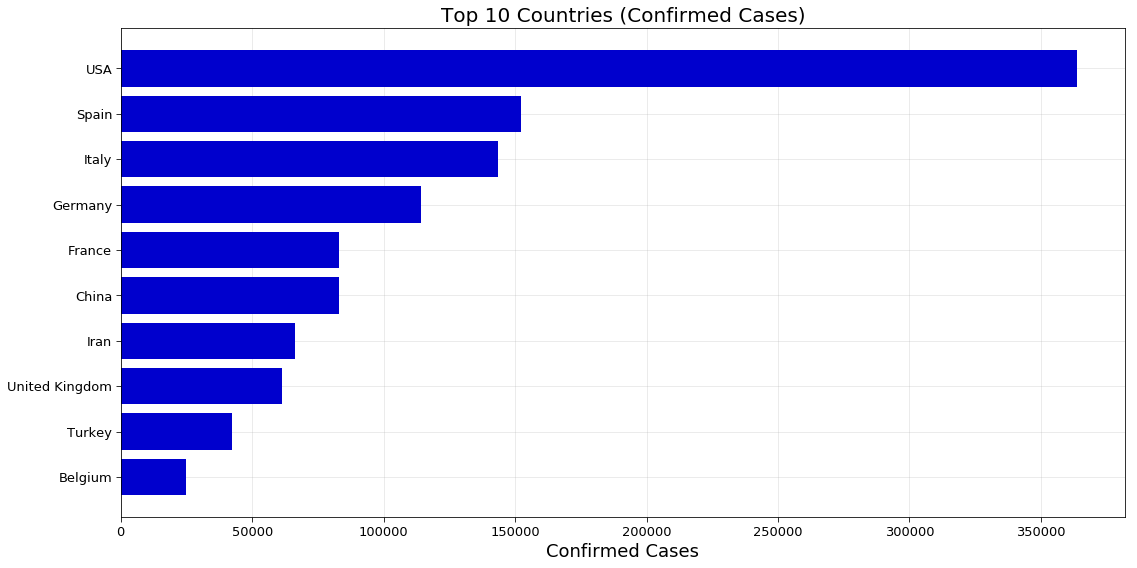

In [101]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="mediumblue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

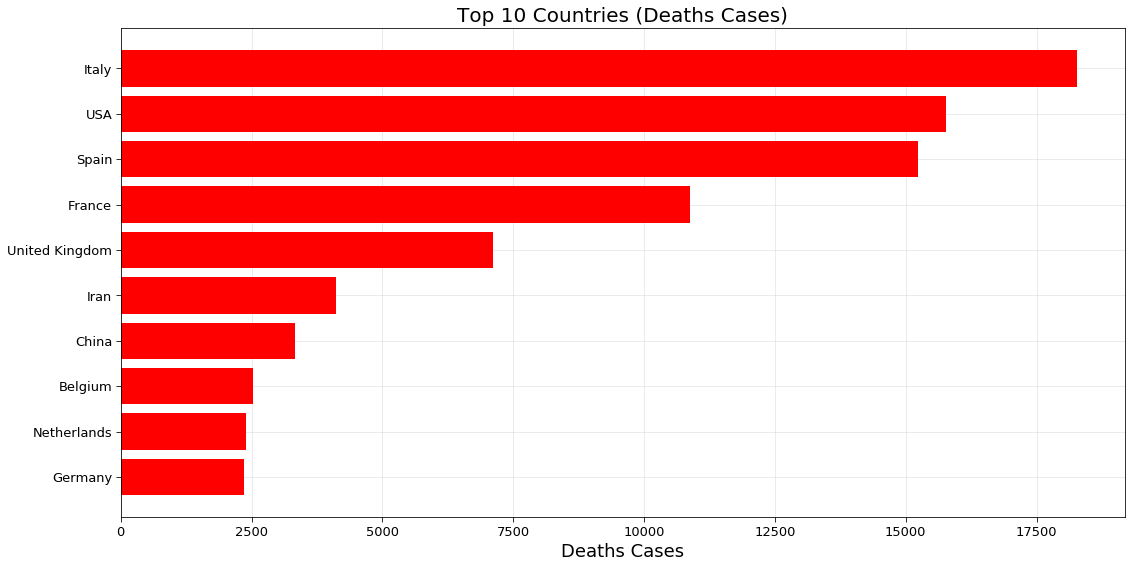

In [102]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

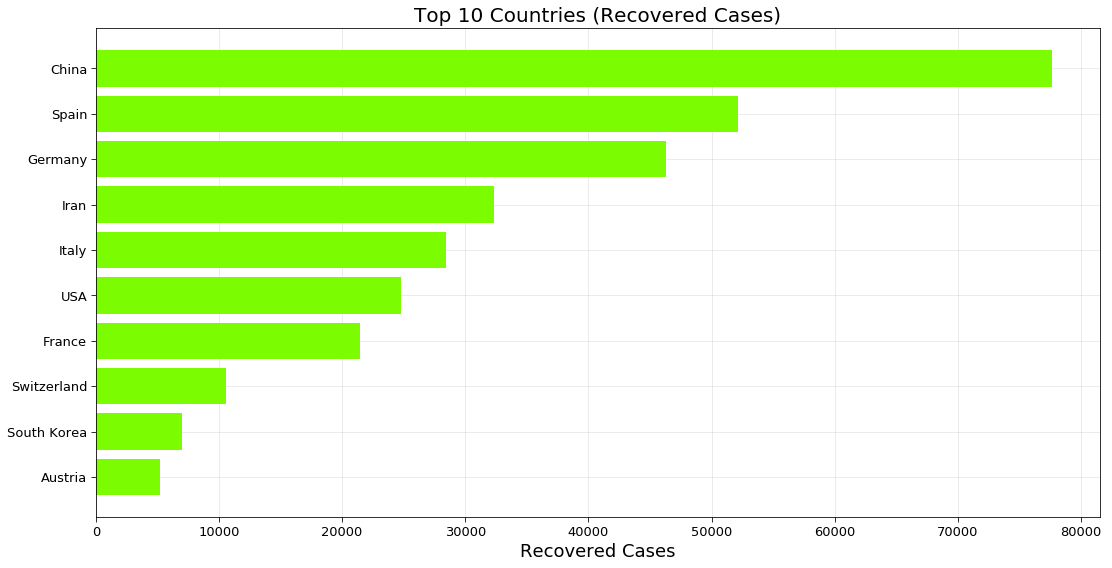

In [103]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="lawngreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Recovered Cases).png')

In [104]:
df_countries_cases.corr().style.background_gradient(cmap='OrRd')

,Confirmed,Deaths,Recovered,Active,Mortality_Rate(per100)
Confirmed,1,0.867724,0.663134,0.96797,0.111525
Deaths,0.867724,1,0.632275,0.800098,0.215076
Recovered,0.663134,0.632275,1,0.456727,0.0913685
Active,0.96797,0.800098,0.456727,1,0.0920346
Mortality_Rate(per100),0.111525,0.215076,0.0913685,0.0920346,1


In [105]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [106]:
df_countries = df_confirmed.groupby(['country']).sum()

In [107]:
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)

In [108]:
countries = df_countries[df_countries[df_countries.columns[-1]] >= 20000].index

In [109]:
countries

Index(['USA', 'Spain', 'Italy', 'France', 'Germany', 'China', 'Iran',
       'United Kingdom', 'Turkey', 'Belgium', 'Switzerland', 'Netherlands'],
      dtype='object', name='country')

In [110]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = "From "+stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]
    
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/Total_confirmed)*100,2)
    
    return np.nan_to_num(mortality_rate)
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

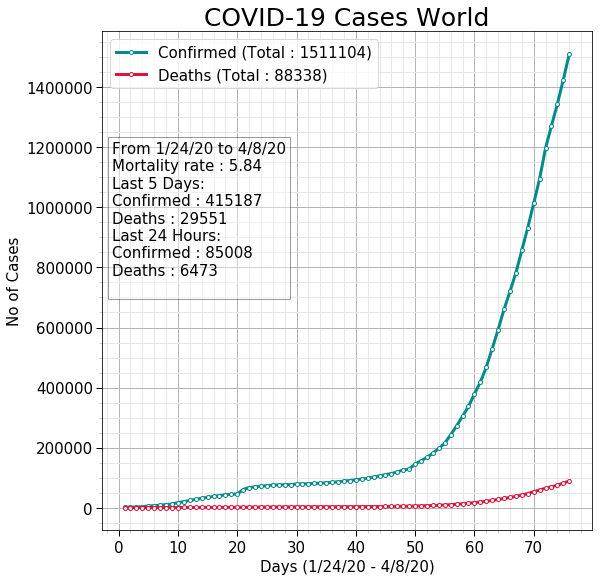

In [111]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))
visualize_covid_cases(df_confirmed, df_deaths,country = "All",figure = [f,rows,cols, 1])

plt.savefig('COIVD-19-World.png')
plt.show()

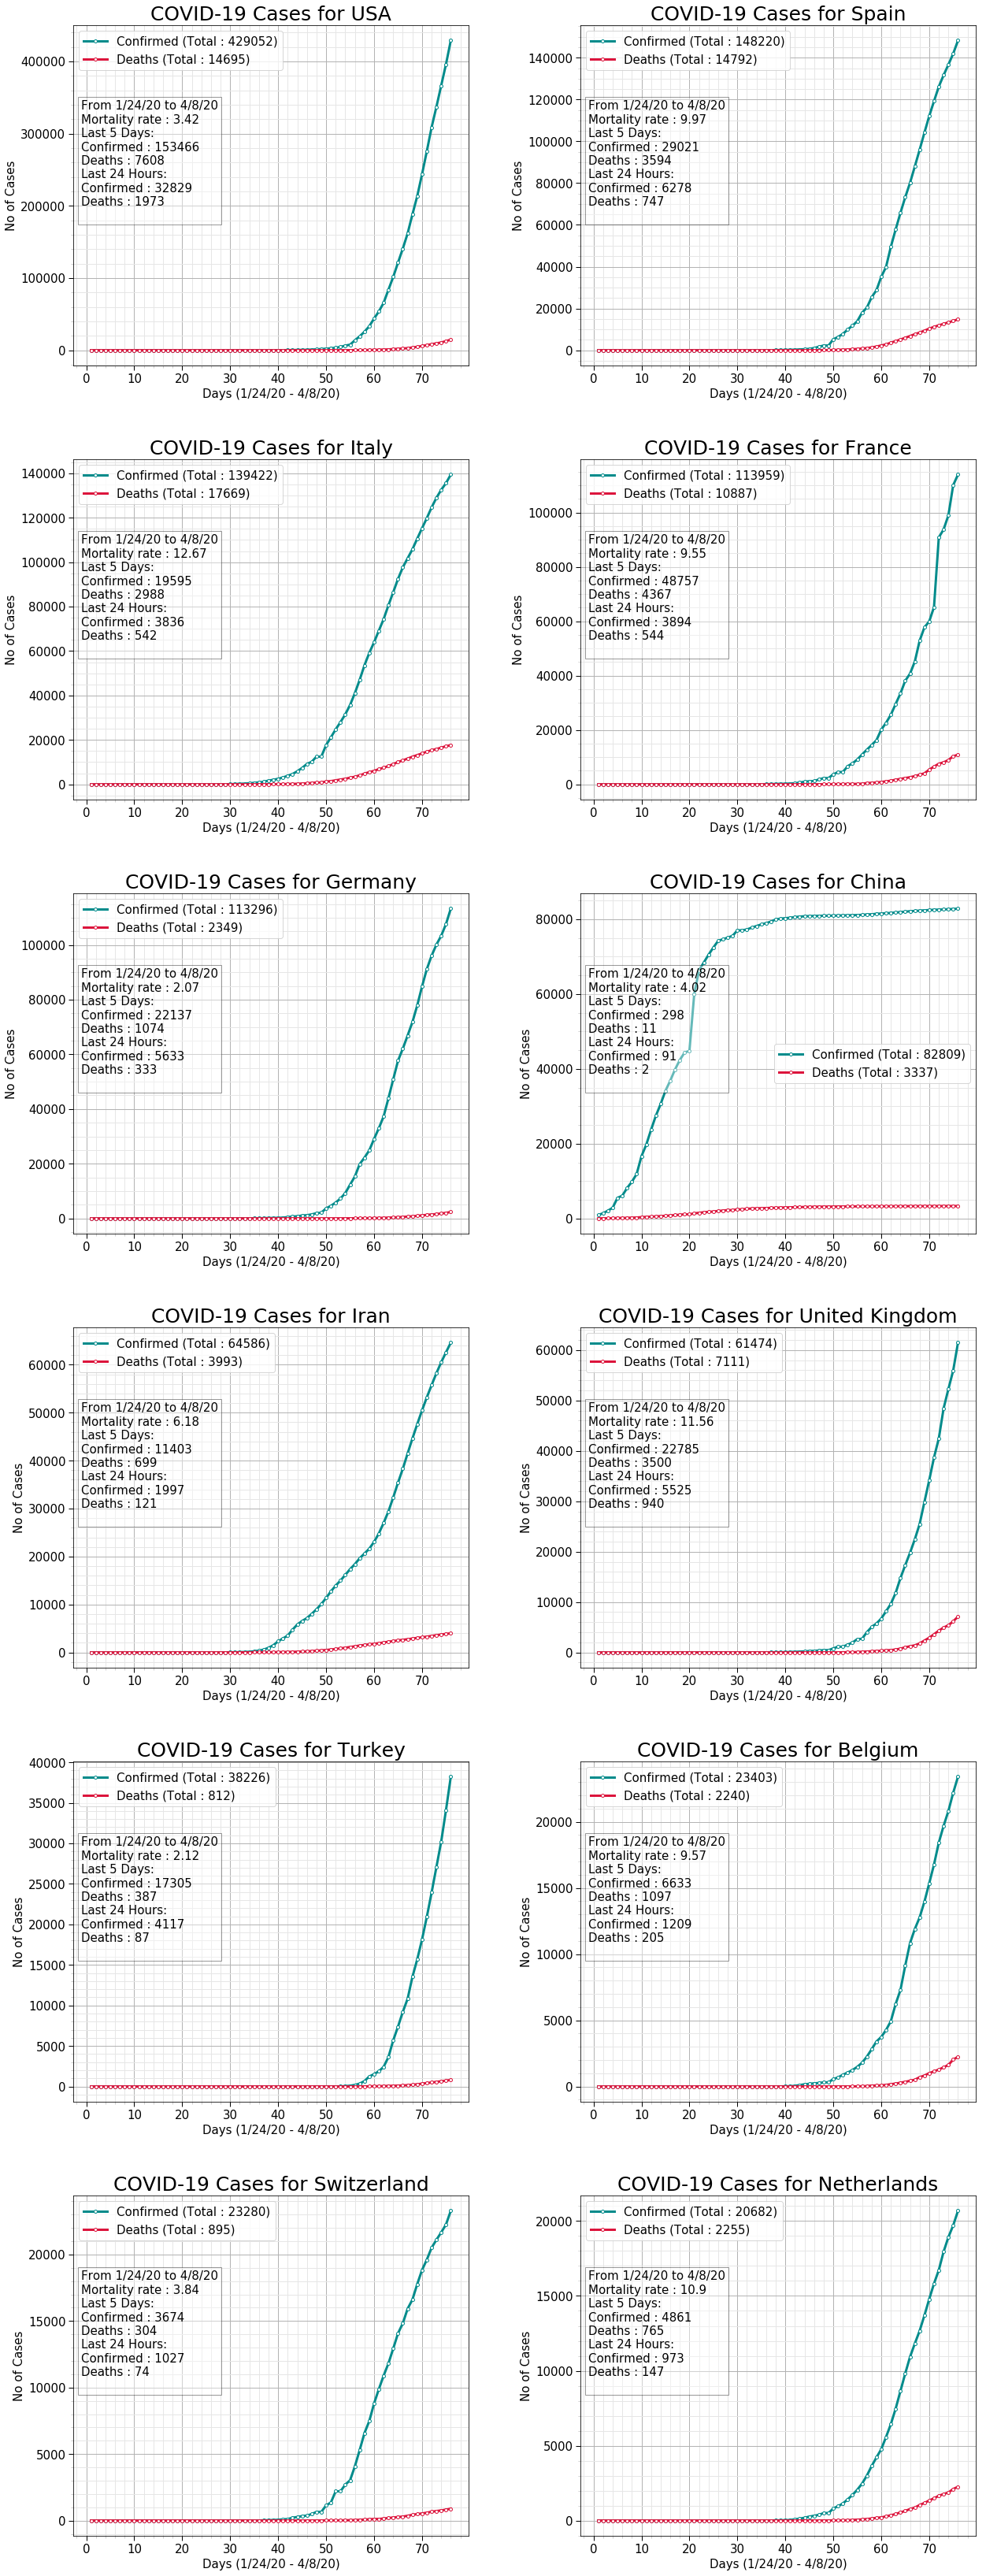

In [112]:
df_countries = df_countries.groupby(['country']).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending=False)
countries = df_countries[df_countries[df_countries.columns[-1]]>=20000].index
cols = 2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(20,8*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed,df_deaths,country=country,figure=[f,rows,cols,i+1])
    
plt.savefig("Top 10 countries latest trends.png")
plt.show()

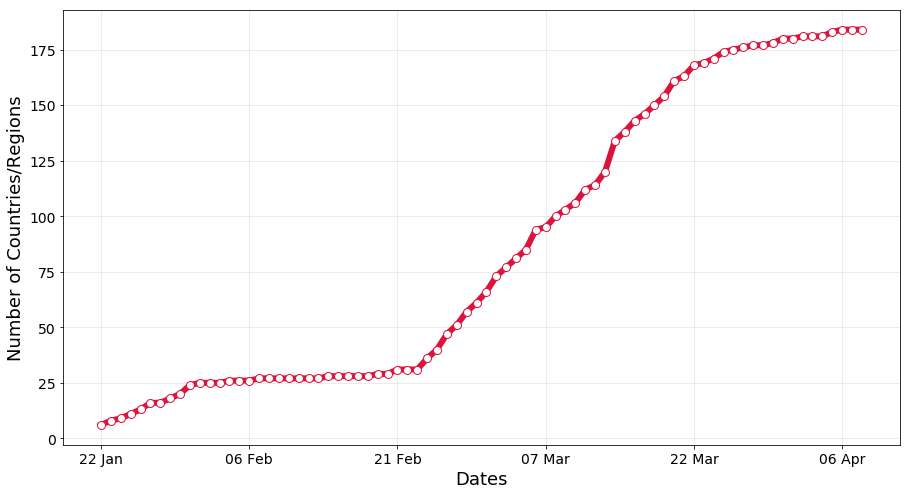

In [113]:
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)
marker_style = dict(c="crimson",linewidth=6, linestyle='-', marker='o',markersize=8, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries/Regions",fontsize=18)
plt.grid(alpha = 0.3)

plt.savefig('spread.png')
plt.show()
plt.close()

In [116]:
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
!wget https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5

--2020-04-09 17:33:41--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_deaths.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [application/octet-stream]
Saving to: ‘model_deaths.h5.1’

model_deaths.h5.1   100%[===================>] 108.41K  --.-KB/s    in 0.003s  

2020-04-09 17:33:41 (31.5 MB/s) - ‘model_deaths.h5.1’ saved [111008/111008]

--2020-04-09 17:33:41--  https://raw.githubusercontent.com/tarunk04/COVID-19-CaseStudy-and-Predictions/master/models/model_confirmed.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111008 (108K) [app

In [117]:
model = models.load_model('model_confirmed.h5')

In [118]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 81        
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0  

In [119]:
data_y = np.log10(np.asarray(df_confirmed.sum()[5:]).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

In [ ]:
lakh = 100000
prediction_days = 10
data = np.power(10,model.predict(np.arange(1,len(data_y)+prediction_days+1)))
temp_data = df_confirmed.iloc[:,5:].sum(axis =0)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')
plt.plot(date,temp_data/lakh,"-.",color="darkcyan",**marker_style, label="Actual Curve")

date = np.arange(0,len(data))
plt.plot(date,data/lakh,"-.",color="orangered",label="Predicted Curve")

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total = d + nextdays

text = "Prediction for next "+str(prediction_days) +" days:\n"
for i in range(prediction_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(prediction_days-i)],-3)[0]/lakh)+" L\n"

plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

# Plot Title
plt.title("COVID-19 Next 10 day Prediction Curve-Global Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases (Lakh)",fontsize =18)

plt.yscale("log")
plt.legend(fontsize =18)
plt.tick_params(labelsize = 13) 
plt.savefig("Prediction Curve-Confirmed.png")
plt.show()

In [ ]:
# Data
temp_data = np.nan_to_num(df_confirmed.sum()[5:].diff())


# Plot
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/1000,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily New Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.tick_params(labelsize = 13) 
plt.savefig("daily confirmed cases global.png")
plt.show()

In [ ]:
# Data
temp_data = np.nan_to_num(df_deaths.sum()[5:].diff())


# Plot
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/1000,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily Deaths Reported",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Deaths Reported (Thousand)",fontsize =18)

# plt.yscale("log")
plt.savefig("daily deaths cases Global.png")
plt.show()



In [ ]:
thoudand = 1000
temp = df_confirmed.groupby('country').sum().diff(axis=1).sort_values(df_deaths.columns[-1],ascending =False).head(10).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Daily Confirmed Cases in Different Countries",{'fontsize':24})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize=18) 
plt.savefig("daily confirmed cases countrywise.png")
plt.show()


In [ ]:
thoudand = 1000
temp = df_deaths.groupby('country').sum().diff(axis=1).sort_values(df_deaths.columns[-1],ascending =False).head(10).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=15)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Daily Deaths Reported in Different Countries",{'fontsize':24})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Deaths Reported (Thousand)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize=18) 
plt.savefig("daily deaths reported countrywise.png")
plt.show()

# COVID19 -  INDIA DATA ANALYSIS

In [ ]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()

In [ ]:
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [ ]:
df_india = df_india.sort_values('confirmed',ascending=False)
df_india = df_india[['confirmed','active','recovered','deaths']]
df_india

In [ ]:
total = df_india.sum()
total.name = "Total"

df_india_total = pd.DataFrame(total).transpose().style.background_gradient(cmap='prism',axis=1)
df_india_total

In [ ]:
df_india_total.to_excel('India_COVID19_totalData.xlsx',engine='openpyxl')

In [ ]:
df_india['Mortality_Rate(per100)'] = np.round(100 * df_india['deaths']/df_india['confirmed'],2)

df_india.sort_values('confirmed',ascending=False,inplace=True)

df_india

In [ ]:
df_india_styled = df_india.style.background_gradient('prism')
df_india_styled

df_india_styled = df_india.style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality_Rate(per100)"])


In [ ]:
df_india_styled

In [ ]:
df_india_styled.to_excel('India_COVID19_data.xlsx',engine='openpyxl')

In [ ]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
df_india["Lat"] = ""
df_india["Long"] = ""
for index in df_india.index :
    df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
    df_india.loc[df_india.index == index,"Long"] = locations[index][1]

In [ ]:
url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
state_json = requests.get(url).json()
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%")
for i in range(0,len(df_india[df_india['confirmed']>0].index)):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['deaths']/(df_india.iloc[i]['confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+1)))*15000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(india)

india

In [ ]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[:],df_india.sort_values('confirmed')["confirmed"].values[:],color="mediumblue")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("India States (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Confirmed Cases).png')

In [ ]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('active')["active"].index[:],df_india.sort_values('active')["active"].values[:],color="yellow")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("India States (ActiveCases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Active Cases).png')

In [ ]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('recovered')["recovered"].index[:],df_india.sort_values('recovered')["recovered"].values[:],color="lawngreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("India States (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Recovered Cases).png')

In [ ]:
f = plt.figure(figsize=(18,9))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_india.sort_values('deaths')["deaths"].index[:],df_india.sort_values('deaths')["deaths"].values[:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("India States (Deaths)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('India States (Deaths).png')


# COVID-19 : USA TRENDS AND ANALYSIS

In [ ]:
date_usa = datetime.strptime(df_confirmed.columns[-1],'%m/%d/%y').strftime('%m-%d-%Y')
df_temp = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+date_usa+".csv")
df_usa = df_temp.loc[df_temp['Country_Region'] == 'US']
df_usa = df_usa.rename(columns={'Admin2':'County'})
df_usa = df_usa.rename(columns={'Province_State':'State'})
df_usa

In [ ]:
total = df_usa.sum()
total.name = "Total"
pd.DataFrame(total).transpose().loc[:,['Confirmed','Deaths']].style.background_gradient(cmap='prism',axis=1)

In [ ]:
df_usa_styled = df_usa.loc[:,['Confirmed','Deaths','State']].groupby(['State']).sum().sort_values('Confirmed',ascending=False).style.background_gradient(cmap='Blues',subset=['Confirmed']).background_gradient(cmap='Reds',subset=['Deaths'])
df_usa_styled.to_excel('USA_COVID19_DATA.xlsx',engine='openpyxl')
df_usa_styled

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["State"]).sum().sort_values('Confirmed')["Confirmed"].index[-10:],df_usa.groupby(["State"]).sum().sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: USA (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_USA (Confirmed Cases).png')



In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_usa.groupby(["State"]).sum().sort_values('Deaths')["Deaths"].index[-10:],df_usa.groupby(["State"]).sum().sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: USA (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 States_USA (Deaths Cases).png')

In [ ]:
# url = "https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/master/Indian_States"
# state_json = requests.get(url).json()
df_usa = df_usa.replace(np.nan, 0, regex=True)
usa = folium.Map(location=[37, -102], zoom_start=4,max_zoom=8,min_zoom=4)
for i in np.int32(np.asarray(df_usa[df_usa['Confirmed'] > 0].index)):
    folium.Circle(
        location=[df_usa.loc[i]['Lat'], df_usa.loc[i]['Long_']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_usa.loc[i]['State']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_usa.loc[i]['County']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_usa.loc[i]['Confirmed'])+"</li>"+
        "<li>Active:   "+str(df_usa.loc[i]['Active'])+"</li>"+
        "<li>Recovered:   "+str(df_usa.loc[i]['Recovered'])+"</li>"+       
        "<li>Deaths:   "+str(df_usa.loc[i]['Deaths'])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_usa.loc[i]['Deaths']/(df_usa.loc[i]['Confirmed']+1)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=int((np.log2(df_usa.loc[i]['Confirmed']+1))*6000),
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(usa)

usa

In [ ]:
!tar cvfz allfiles.tar.gz *